In [1]:
#############################################
# Diabetes Feature Engineering
##############################################

#############################################
# It is requested to develop a machine learning model that can predict whether people have 
# diabetes when their characteristics are specified. You are expected to perform the necessary 
# data analysis and feature engineering steps before developing the model.
##############################################

#############################################
# The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney 
# Diseases in the USA. in the USA On Pima Indian women aged 21 and over living in Phoenix, the 5th 
# largest city in the State of Arizona. Data used for diabetes research. The target variable is 
# specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.#############################################
#############################################

#############################################
#9 Değişken  # 768 Gözlem
# Pregnancies: # of pregnancies
# Glucose: 2-hour plasma glucose concentration in the oral glucose tolerance test
# Blood Pressure: in mm Hg
# SkinThickness
# Insulin: 2-hour serum insulin (mu U/ml)
# DiabetesPedigreeFunction: Function (2 hour plasma glucose concentration in oral glucose tolerance test)# BMI: Vücut kitle endeksi
# Age
# Outcome:  Sick (1) or not (0)
##############################################

In [2]:

##############################################
# Duty 1 : Explorenatary Data Analysis
##############################################


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


def load():
    data = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")
    return data


df = load()
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:

#############################################
# Step 1: Check out the overall picture
#############################################


def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

df.head()
df["Insulin"].nunique()


##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 2

186

In [4]:
#############################################
# Step 2: Capture the numeric and categorical variables.
#############################################


def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical view cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)



Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


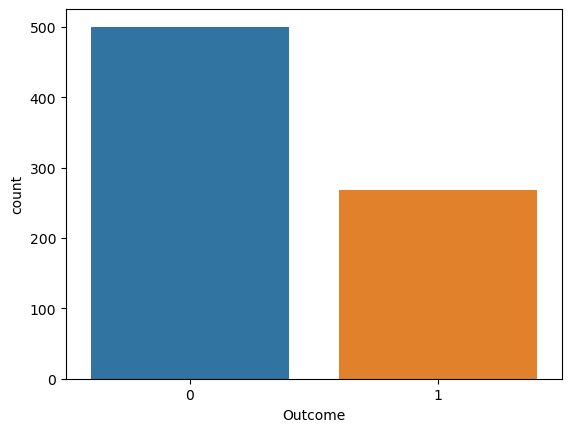

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


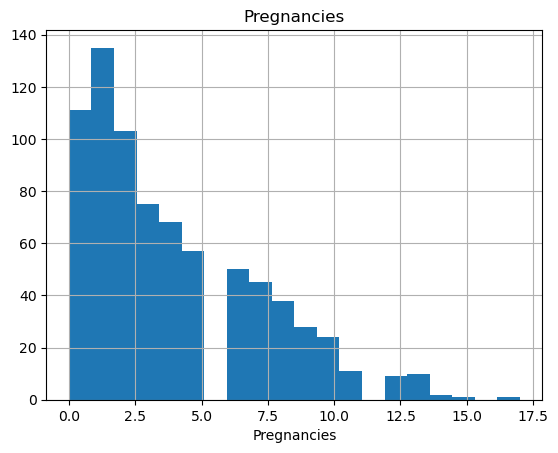

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


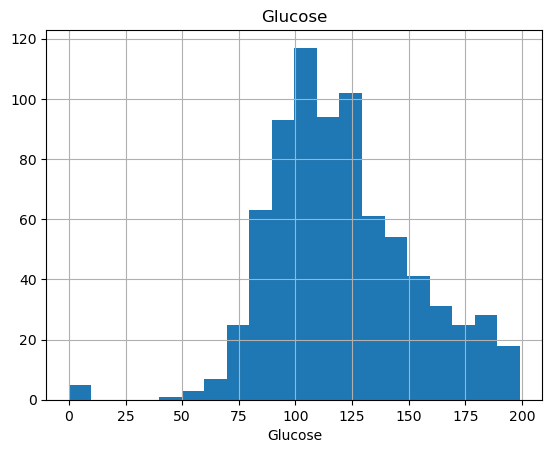

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


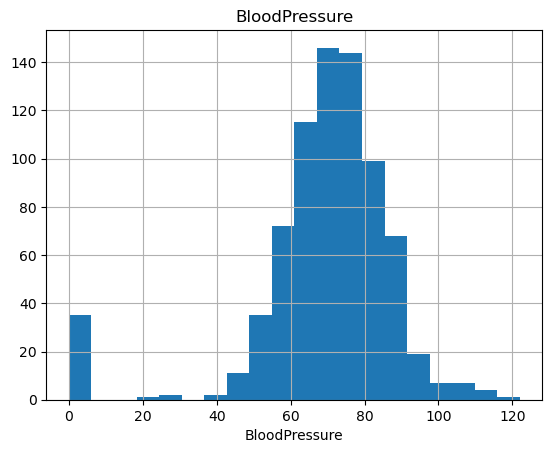

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


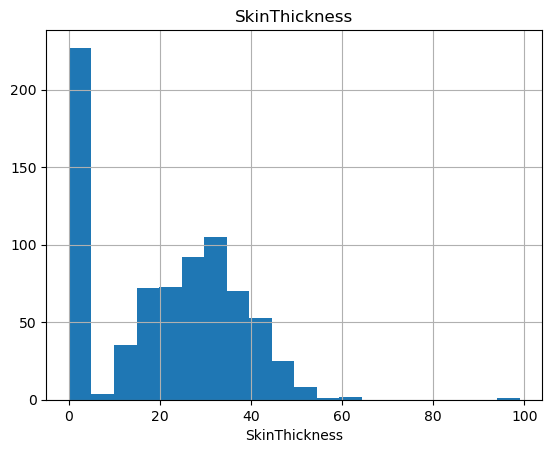

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


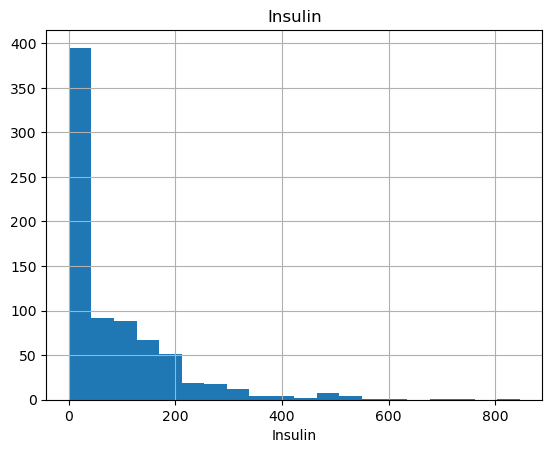

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


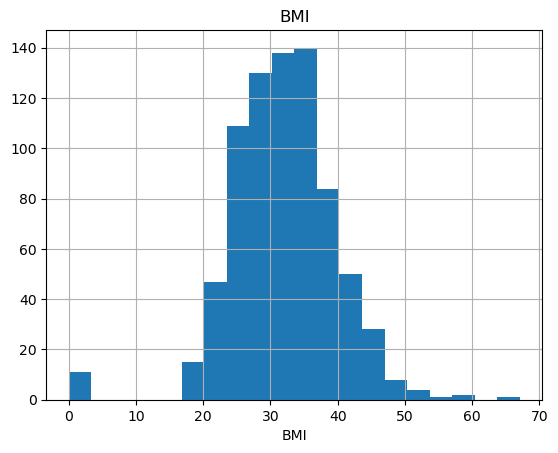

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


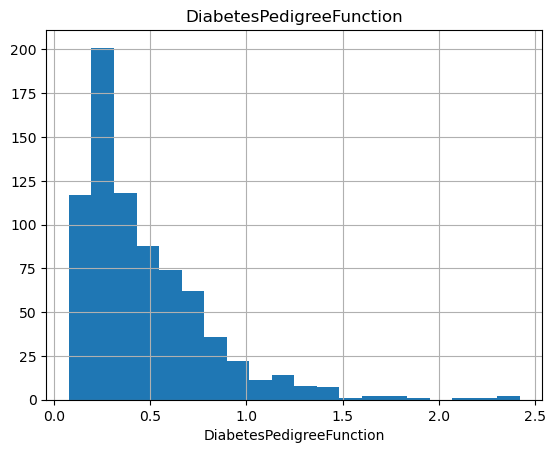

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


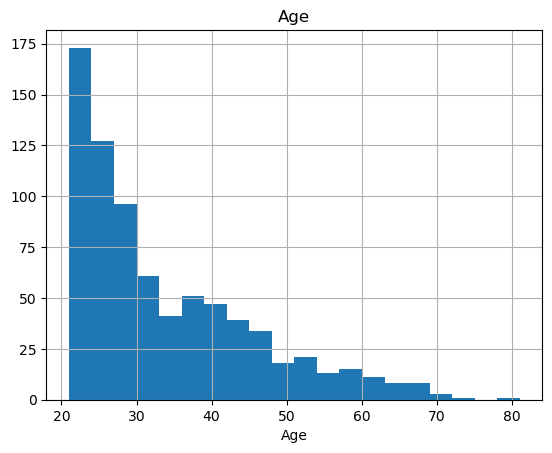

In [5]:
#############################################
# Step 3: Analyze the numerical and categorical variables.
#############################################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)



In [6]:

#############################################
# Step 4: Perform target variable analysis. (The mean of the target variable according to the categorical 
# variables, the mean of the numeric variables according to the target variable)
#############################################
df["Outcome"].value_counts()

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col)



def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Outcome", col)



         TARGET_MEAN
Outcome             
0              0.000
1              1.000


         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




In [7]:
#############################################
# Step 5: Analyze the outlier observation.
#############################################

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col))

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

for col in num_cols:
    print(col, grab_outliers(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
88            15      136             70             32      110 37.100                     0.153   43        1
159           17      163             72             41      114 40.900                     0.817   47        1
298           14      100             78             25      184 36.600                     0.412   46        1
455           14      175             62             30        0 33.600                     0.212   38        1
Pregnancies None
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0 24.700                     0.140   22        0
182            1        0             74             20       23 27.70

In [8]:
#############################################
# Step 6: Perform missing observation analysis.
#############################################

df.isnull().values.any()


def missing_values_table(dataframe, na_name=False):
        na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
        n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
        ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending = False)
        missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys = ['n_miss', 'ratio'])
        print(missing_df, end = "\n")

        if na_name:
            return na_columns

missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


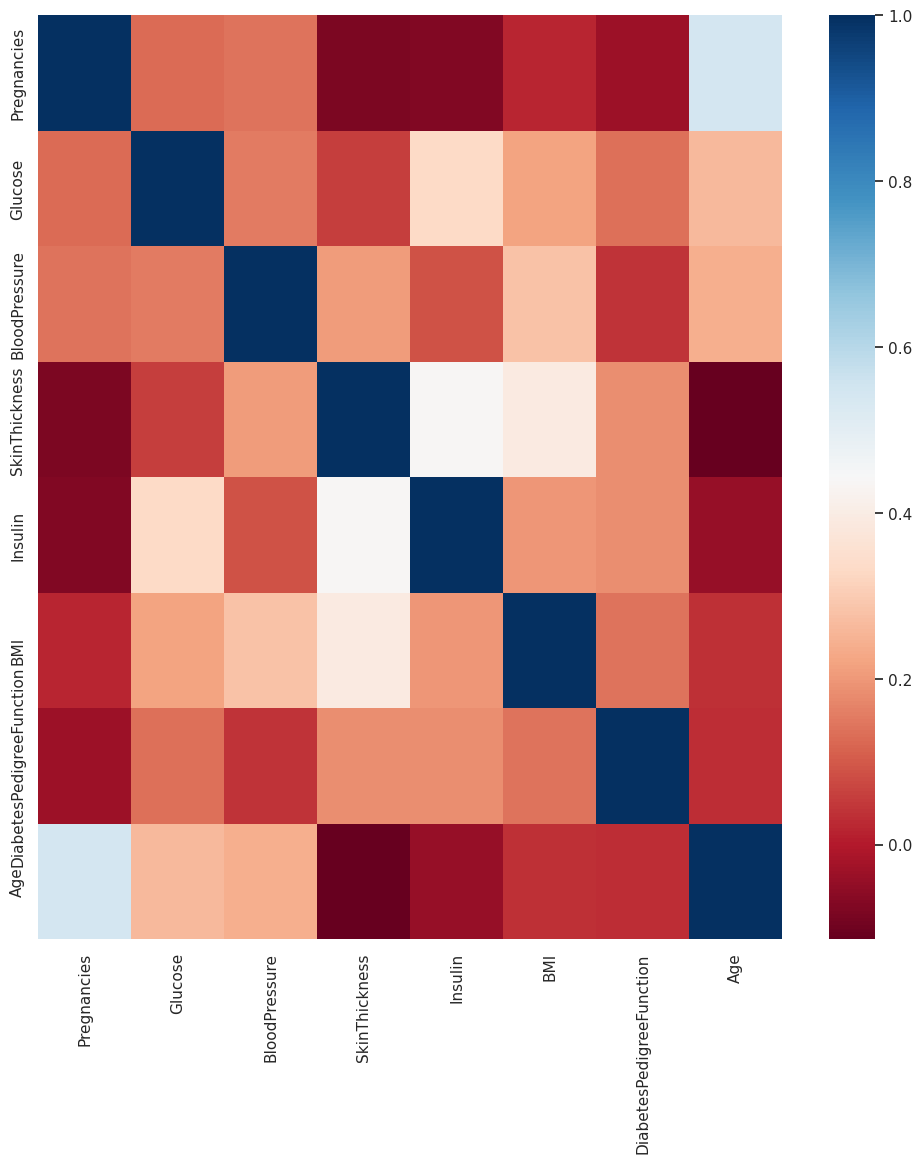

In [9]:
#############################################
# Step 7: Perform correlation analysis.
#############################################

corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64
count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64
count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64
count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10% 

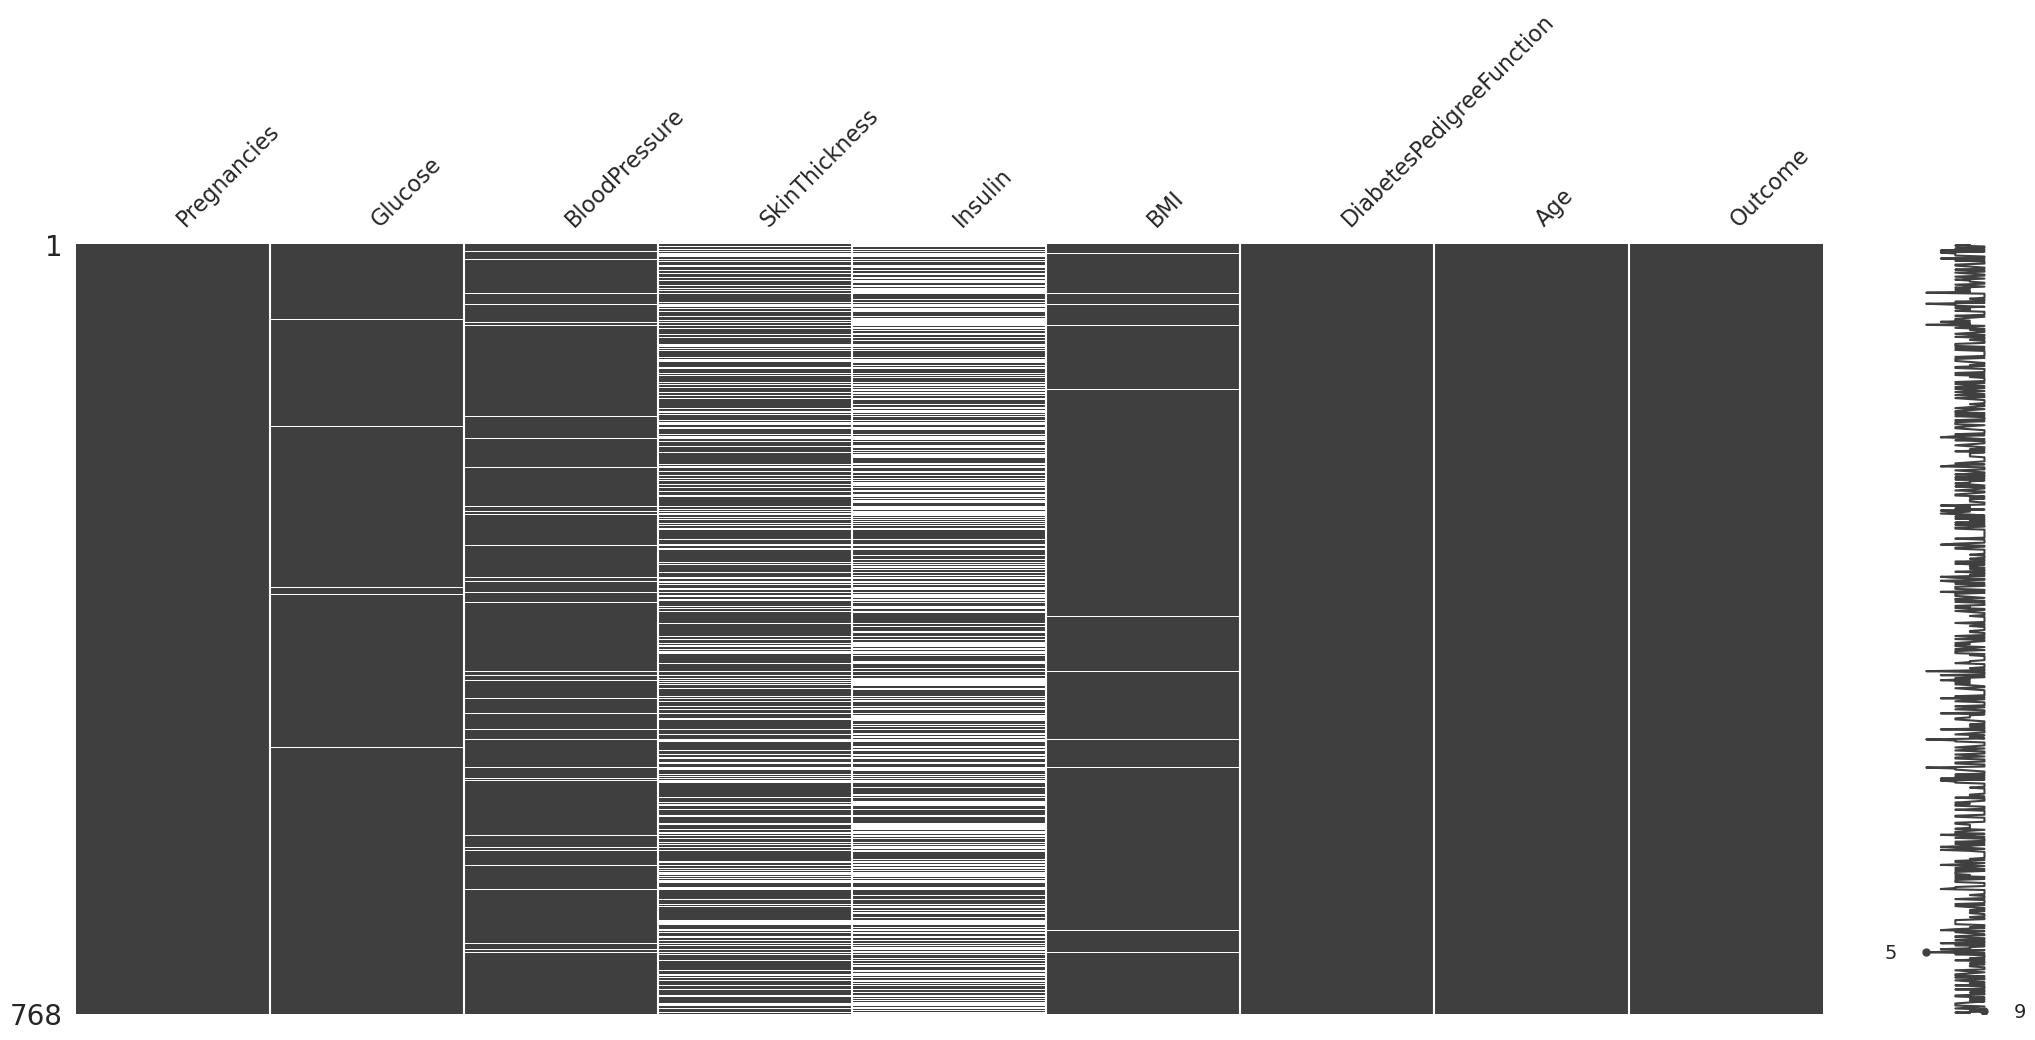

0     148.000
1      85.000
2     183.000
3      89.000
4     137.000
5     116.000
6      78.000
7     115.000
8     197.000
9     125.000
10    110.000
11    168.000
12    139.000
13    189.000
14    166.000
15    100.000
16    118.000
17    107.000
18    103.000
19    115.000
20    126.000
21     99.000
22    196.000
23    119.000
24    143.000
25    125.000
26    147.000
27     97.000
28    145.000
29    117.000
30    109.000
31    158.000
32     88.000
33     92.000
34    122.000
35    103.000
36    138.000
37    102.000
38     90.000
39    111.000
40    180.000
41    133.000
42    106.000
43    171.000
44    159.000
45    180.000
46    146.000
47     71.000
48    103.000
49    105.000
50    103.000
51    101.000
52     88.000
53    176.000
54    150.000
55     73.000
56    187.000
57    100.000
58    146.000
59    105.000
60     84.000
61    133.000
62     44.000
63    141.000
64    114.000
65     99.000
66    109.000
67    109.000
68     95.000
69    146.000
70    100.000
71    

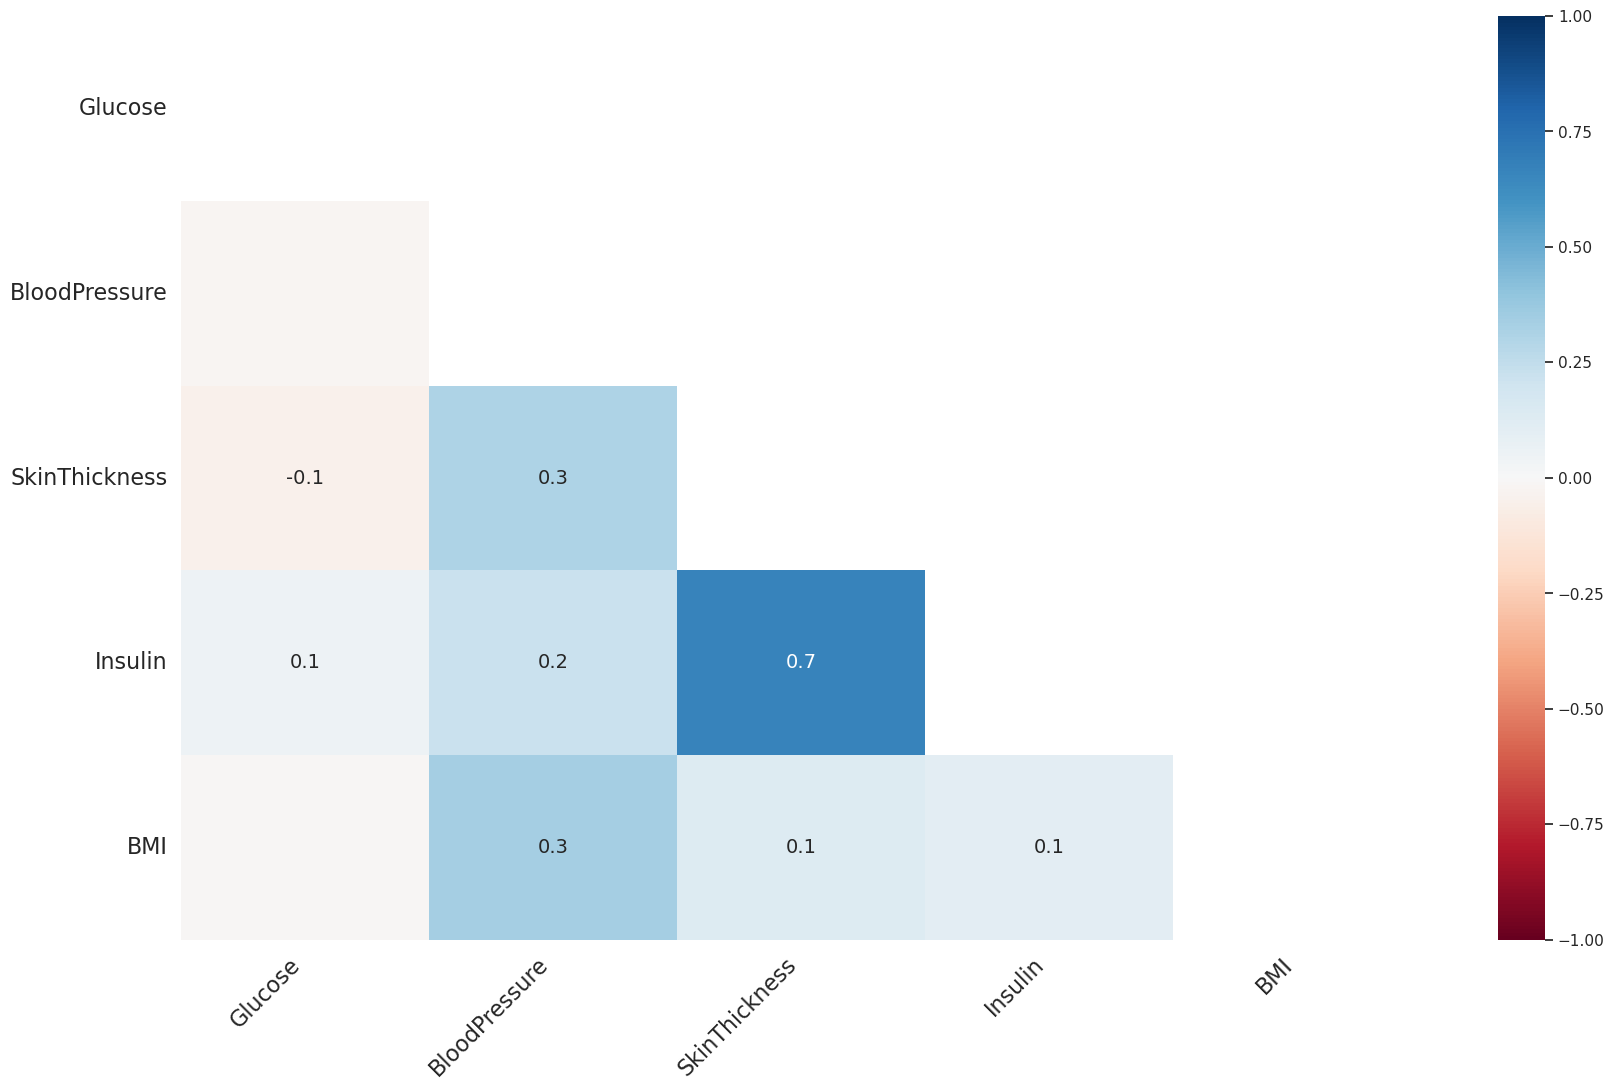

In [10]:
#############################################
# Duty 2 : Feature Engineering
#############################################

#############################################
# Step 1: Take necessary actions for missing and outlier values. There are no missing 
# observations in the data set, but Glucose, Insulin etc. Observation units containing 
# a value of 0 in the variables may represent the missing value. For example; a person's 
# glucose or insulin value will not be 0. Considering this situation, you can assign the zero 
# values to the relevant values as NaN and then apply the operations to the missing values.

#############################################

def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

for col in num_cols:
    num_summary(df, col)

print(df.describe().T)

#############################################
# Let's replace the values that shouldn't be "0" with NaN;
#############################################

col = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[col] = df[col].replace(0, np.nan)
df[col]

df.isnull().sum()


(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

msno.matrix(df)
plt.show()

msno.heatmap(df)

df["Insulin"] = df["Insulin"].fillna(df.groupby("Outcome")["Insulin"].transform("mean"))
df["Insulin"]
df["SkinThickness"] = df["SkinThickness"].fillna(df.groupby("Outcome")["SkinThickness"].transform("mean"))
df["SkinThickness"]
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby("Outcome")["BloodPressure"].transform("mean"))
df["BloodPressure"]
df["BMI"] = df["BMI"].fillna(df.groupby("Outcome")["BMI"].transform("mean"))
df["BMI"]
df["Glucose"] = df["Glucose"].fillna(df.groupby("Outcome")["Glucose"].transform("mean"))
df["Glucose"]

In [11]:
#############################################
# Step 2: Create new variables.
#############################################

df.loc[(df['Glucose'] < 70), 'GLUCOSE_CAT'] = "hipoglisemi"
df.loc[(df['Glucose'] >= 70) & (df['Glucose'] < 100), 'GLUCOSE_CAT'] = "normal"
df.loc[(df['Glucose'] >= 100) & (df['Glucose'] < 126), 'GLUCOSE_CAT'] = "imparied glucose"
df.loc[(df['Glucose'] >= 126), 'GLUCOSE_CAT'] = "hiperglisemi"

df.groupby("GLUCOSE_CAT").agg({"Outcome": ["mean", "count"]})
df.head(30)

df.loc[(df['Age'] >= 18) & (df['Age'] < 30), 'AGE_CAT'] = "young_women_"
df.loc[(df['Age'] >= 30) & (df['Age'] < 45), 'AGE_CAT'] = "mature_women"
df.loc[(df['Age'] >= 45) & (df['Age'] < 65), 'AGE_CAT'] = "middle_age"
df.loc[(df['Age'] >= 65) & (df['Age'] < 75), 'AGE_CAT'] = "old_age"
df.loc[(df['Age'] >= 75), 'AGE_CAT'] = "elder_age"

df.groupby("AGE_CAT").agg({"Outcome": ["mean", "count"]})
df


df.loc[(df['BMI'] < 16), 'BMI_CAT'] = "overweak"
df.loc[(df['BMI'] >= 16) & (df['BMI'] < 18.5), 'BMI_CAT'] = "weak"
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25), 'BMI_CAT'] = "normal"
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'BMI_CAT'] = "overweight"
df.loc[(df['BMI'] >= 30) & (df['BMI'] < 35), 'BMI_CAT'] = "1st_Obese"
df.loc[(df['BMI'] >= 35) & (df['BMI'] < 45), 'BMI_CAT'] = "2nd_Obese"
df.loc[(df['BMI'] >= 45), 'BMI_CAT'] = "3rd_Obese"

df.groupby("BMI_CAT").agg({"Outcome": ["mean", "count"]})
df

df.loc[(df['BloodPressure'] < 70), 'DIASTOLIC_CAT'] = "low"
df.loc[(df['BloodPressure'] >= 70) & (df['BMI'] < 90), 'DIASTOLIC_CAT'] = "normal"
df.loc[(df['BloodPressure'] >= 90), 'DIASTOLIC_CAT'] = "high"

df.groupby("DIASTOLIC_CAT").agg({"Outcome": ["mean", "count"]})
df

df.loc[(df['Insulin'] < 120), 'INSULIN_CAT'] = "normal"
df.loc[(df['Insulin'] >= 120), 'INSULIN_CAT'] = "anormal"

df.groupby("INSULIN_CAT").agg({"Outcome": ["mean", "count"]})
df

df.loc[(df['Pregnancies'] == 0), 'PREG_CAT'] = "unpregnant"
df.loc[(df['Pregnancies'] > 0) & (df['Pregnancies'] <= 5), 'PREG_CAT'] = "normal"
df.loc[(df['Pregnancies'] > 5) & (df['Pregnancies'] <= 10), 'PREG_CAT'] = "high"
df.loc[(df['Pregnancies'] > 10), 'PREG_CAT'] = "very high"

df.groupby("PREG_CAT").agg({"Outcome": ["mean", "count"]})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLUCOSE_CAT,AGE_CAT,BMI_CAT,DIASTOLIC_CAT,INSULIN_CAT,PREG_CAT
0,6,148.000,72.000,35.000,206.846,33.600,0.627,50,1,hiperglisemi,middle_age,1st_Obese,normal,anormal,high
1,1,85.000,66.000,29.000,130.288,26.600,0.351,31,0,normal,mature_women,overweight,low,anormal,normal
2,8,183.000,64.000,33.000,206.846,23.300,0.672,32,1,hiperglisemi,mature_women,normal,low,anormal,high
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,normal,young_women_,overweight,low,normal,normal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,hiperglisemi,mature_women,2nd_Obese,low,anormal,unpregnant
5,5,116.000,74.000,27.235,130.288,25.600,0.201,30,0,imparied glucose,mature_women,overweight,normal,anormal,normal
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,normal,young_women_,1st_Obese,low,normal,normal
7,10,115.000,70.877,27.235,130.288,35.300,0.134,29,0,imparied glucose,young_women_,2nd_Obese,normal,anormal,high
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53,1,hiperglisemi,middle_age,1st_Obese,normal,anormal,normal
9,8,125.000,96.000,33.000,206.846,35.407,0.232,54,1,imparied glucose,middle_age,2nd_Obese,high,anormal,high


In [12]:
#############################################
# Step 3: Perform the encoding operations.
#############################################

le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
        labelencoder = LabelEncoder()
        dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
        return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,INSULIN_CAT,GLUCOSE_CAT_hipoglisemi,GLUCOSE_CAT_imparied glucose,GLUCOSE_CAT_normal,AGE_CAT_mature_women,AGE_CAT_middle_age,AGE_CAT_old_age,AGE_CAT_young_women_,BMI_CAT_2nd_Obese,BMI_CAT_3rd_Obese,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_weak,DIASTOLIC_CAT_low,DIASTOLIC_CAT_normal,PREG_CAT_normal,PREG_CAT_unpregnant,PREG_CAT_very high
0,6,148.000,72.000,35.000,206.846,33.600,0.627,50,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,85.000,66.000,29.000,130.288,26.600,0.351,31,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0
2,8,183.000,64.000,33.000,206.846,23.300,0.672,32,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [13]:
#############################################
# Step 4: Standardize for numeric variables.
#############################################

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,INSULIN_CAT,GLUCOSE_CAT_hipoglisemi,GLUCOSE_CAT_imparied glucose,GLUCOSE_CAT_normal,AGE_CAT_mature_women,AGE_CAT_middle_age,AGE_CAT_old_age,AGE_CAT_young_women_,BMI_CAT_2nd_Obese,BMI_CAT_3rd_Obese,BMI_CAT_normal,BMI_CAT_overweight,BMI_CAT_weak,DIASTOLIC_CAT_low,DIASTOLIC_CAT_normal,PREG_CAT_normal,PREG_CAT_unpregnant,PREG_CAT_very high
0,0.640,0.864,-0.035,0.645,0.561,0.168,0.468,1.426,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,-0.845,-1.205,-0.531,-0.028,-0.301,-0.850,-0.365,-0.191,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0
2,1.234,2.014,-0.697,0.421,0.561,-1.330,0.604,-0.106,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,-0.845,-1.074,-0.531,-0.700,-0.709,-0.632,-0.921,-1.042,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,-1.142,0.503,-2.680,0.645,0.124,1.550,5.485,-0.020,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


Accuracy: 0.87
Recall: 0.861
Precision: 0.77
F1: 0.81
Auc: 0.87


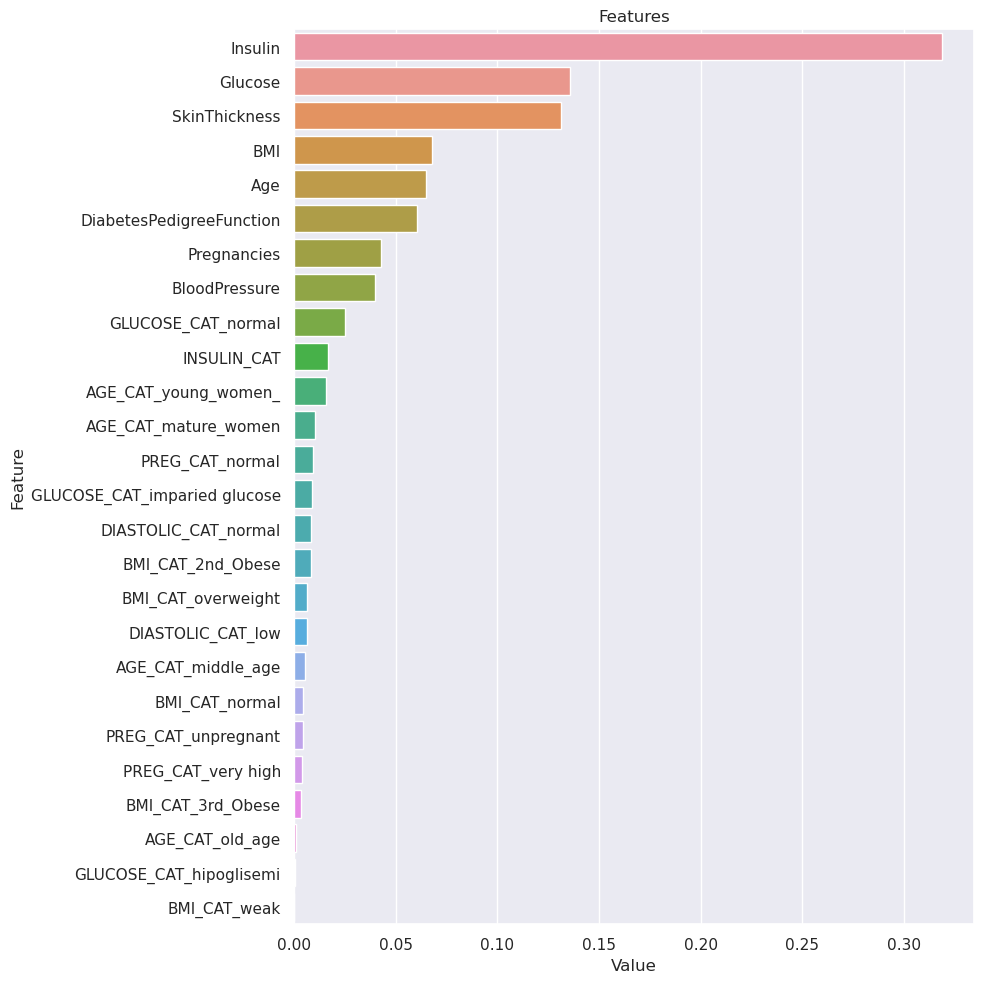

In [14]:
#############################################
# Step 5: Create the model.
#############################################

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X_train)